# predicting turbine energy yield (TEY) using ambient variables as features.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
warnings.filterwarnings("ignore")
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# EDA

In [3]:
df.shape

(15039, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [6]:
corr= df.corr()

In [7]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [26]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

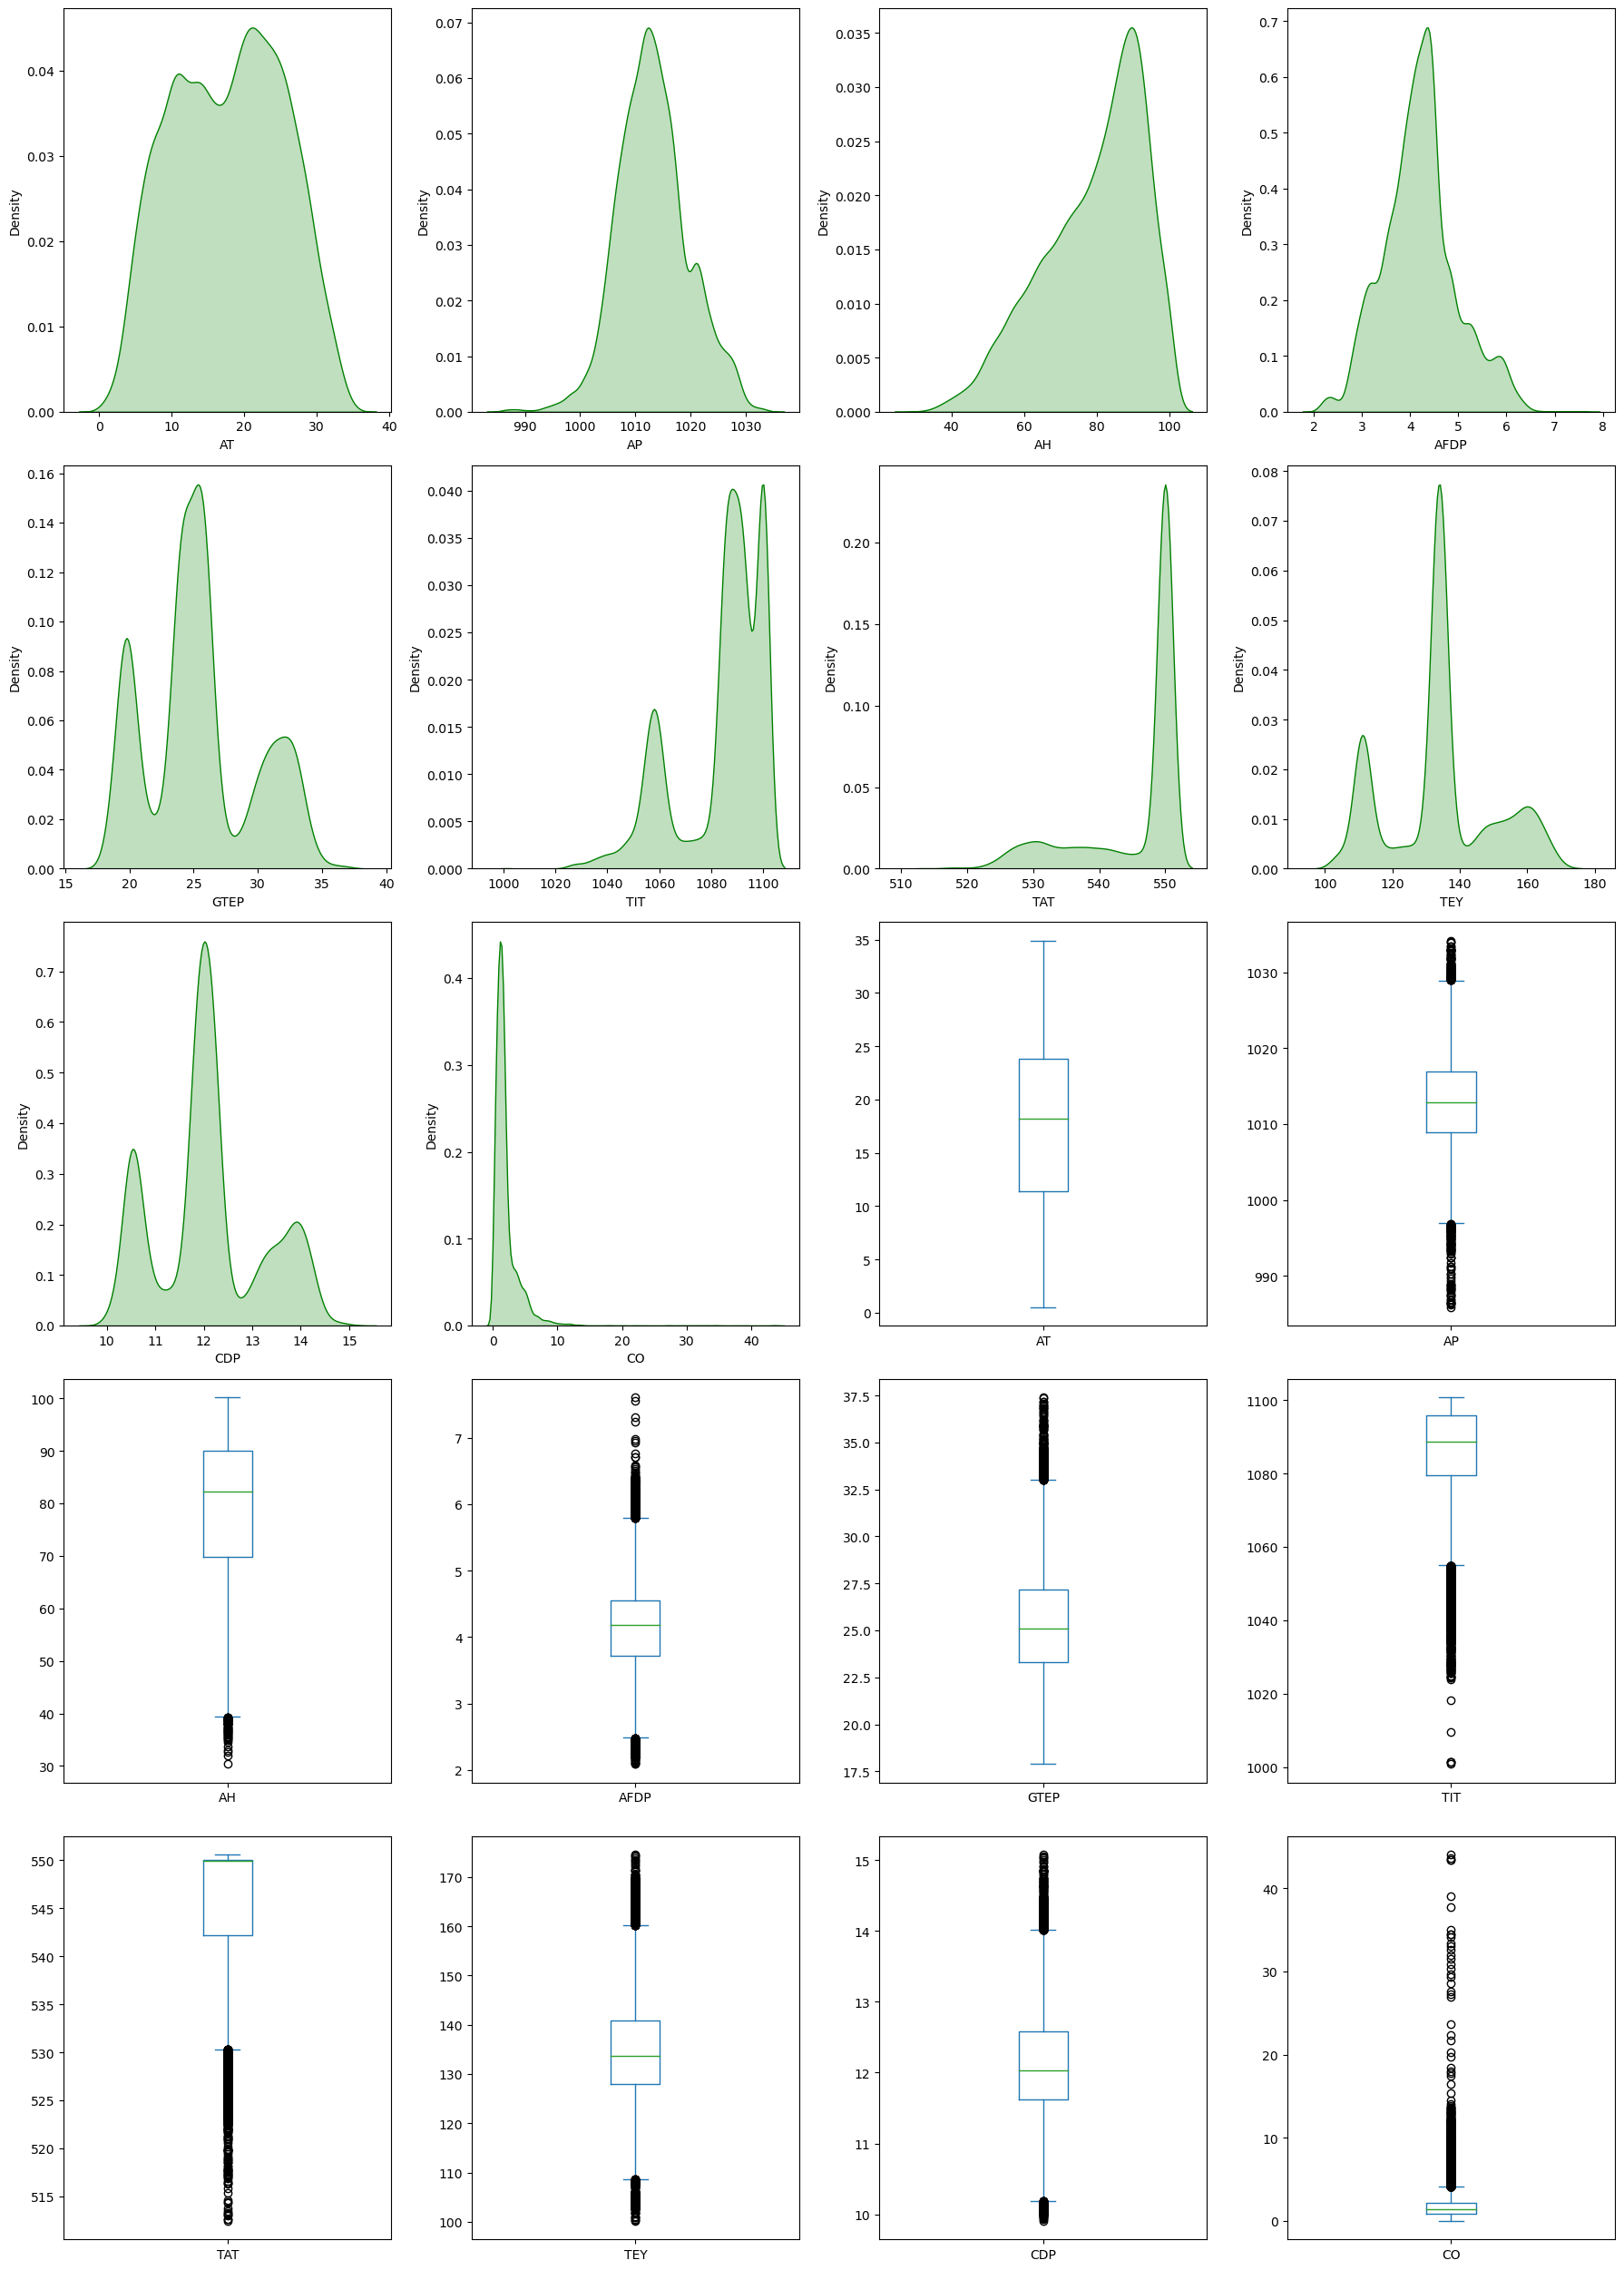

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116


In [38]:
dfa = df[df.columns[0:10]]
month_colum = dfa.select_dtypes(include='object').columns.tolist()
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

AT


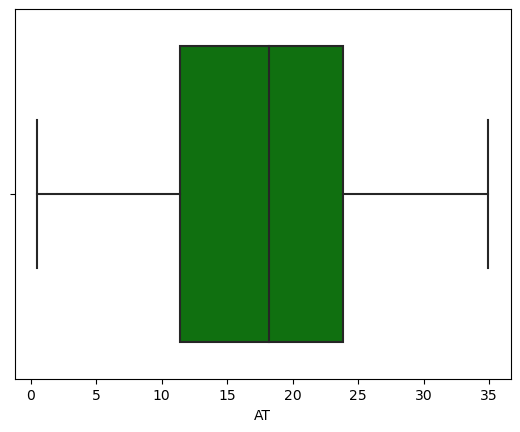

AP


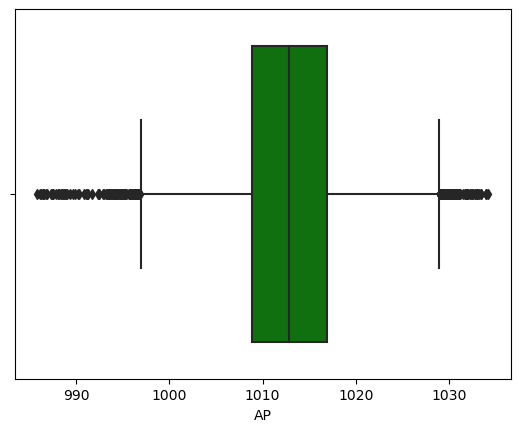

AH


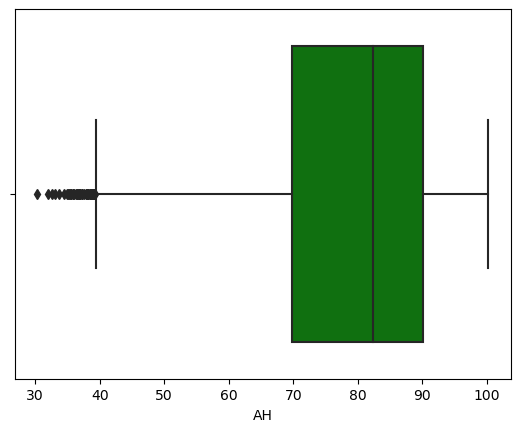

AFDP


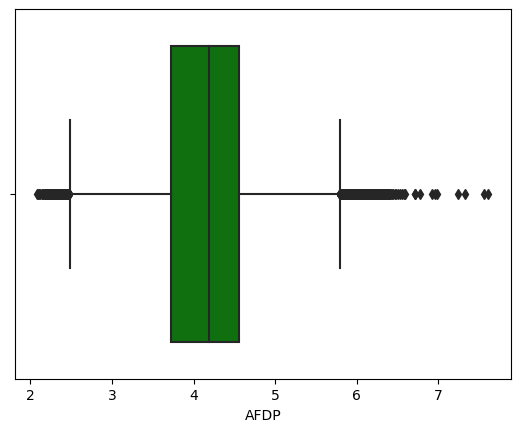

GTEP


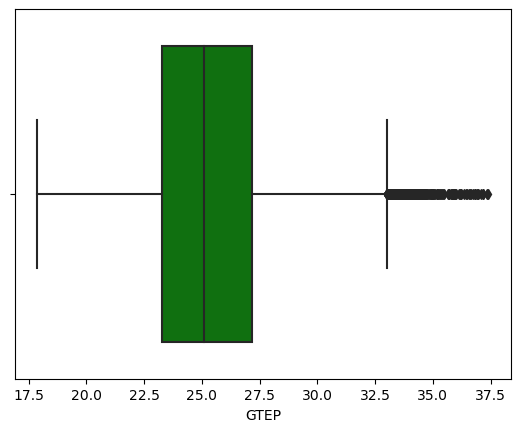

TIT


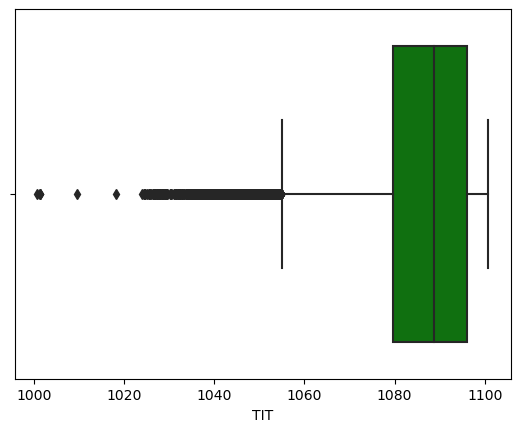

TAT


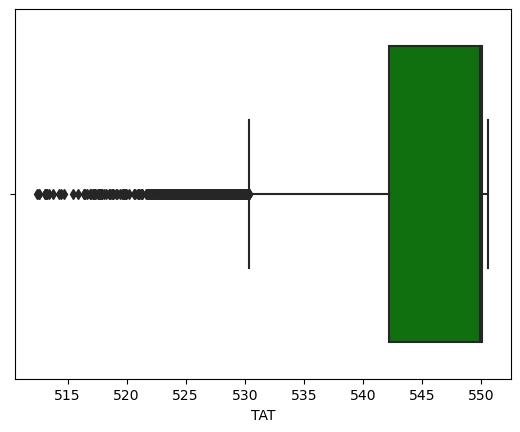

TEY


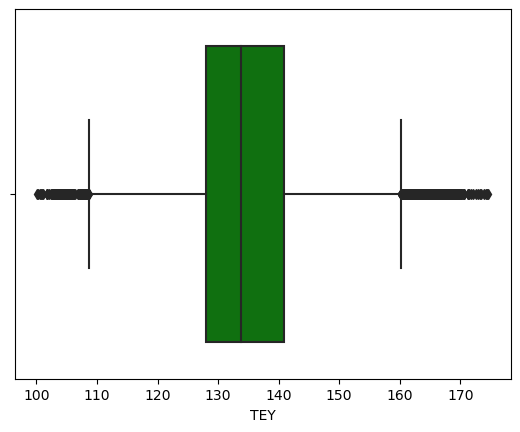

CDP


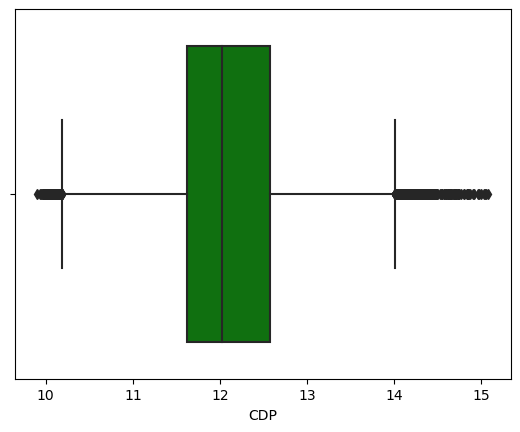

CO


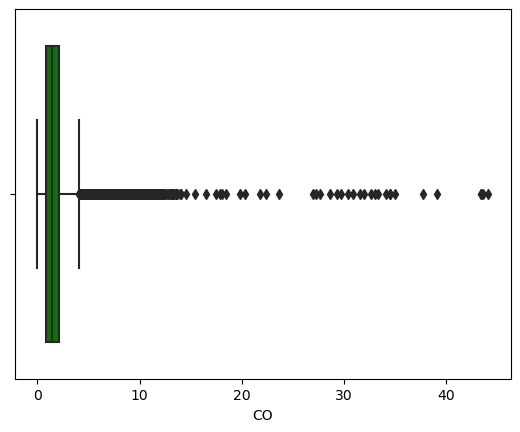

NOX


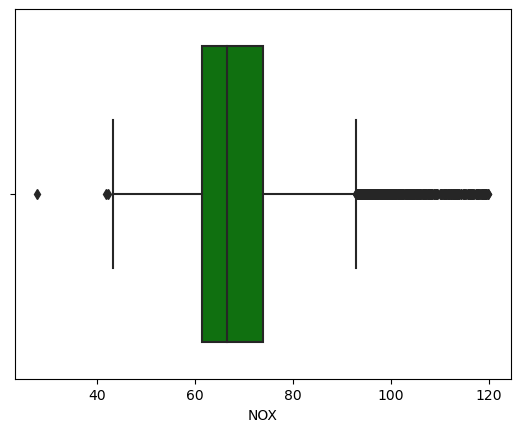

In [27]:
for i in df.columns:
    print(i)
    sns.boxplot(df[i],color = 'green')
    plt.show()

In [8]:
X=df.drop(labels='TEY',axis=1)
Y=df['TEY']

In [9]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [10]:
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [11]:
# Split X and y into X_train, X_test, y_train, y_test with test_size = 0.30 using sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

In [12]:
# Scale the numeric attributes
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Building

In [13]:
model = Sequential()

In [14]:
model.add(Dense(12, input_dim=10,  activation='relu')) #1st layer
model.add(Dense(10,input_dim=12,  activation='relu')) #2nd layer

model.add(Dense(1, activation='sigmoid')) #output layer

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                132       
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics= 'mse')

In [29]:
# Fit the model
history = model.fit(X, Y, validation_split=0.3, epochs=250, batch_size=10)

Epoch 1/250
1053/1053 [==============================] - 2s 1ms/step - loss: 18324.2402 - mse: 18324.2402 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 2/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2383 - mse: 18324.2383 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 3/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2246 - mse: 18324.2246 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 4/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2578 - mse: 18324.2578 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 5/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2344 - mse: 18324.2344 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 6/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2500 - mse: 18324.2500 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 7/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2402 - mse:

Epoch 55/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2637 - mse: 18324.2637 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 56/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2266 - mse: 18324.2266 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 57/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2539 - mse: 18324.2539 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 58/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2617 - mse: 18324.2617 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 59/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2520 - mse: 18324.2520 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 60/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2383 - mse: 18324.2383 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 61/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2637

Epoch 109/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2520 - mse: 18324.2520 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 110/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2441 - mse: 18324.2441 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 111/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2520 - mse: 18324.2520 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 112/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2539 - mse: 18324.2539 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 113/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2422 - mse: 18324.2422 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 114/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2520 - mse: 18324.2520 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 115/250
1053/1053 [==============================] - 1s 1ms/step - loss: 183

1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2578 - mse: 18324.2578 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 163/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2441 - mse: 18324.2441 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 164/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2461 - mse: 18324.2461 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 165/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2344 - mse: 18324.2344 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 166/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2461 - mse: 18324.2461 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 167/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2617 - mse: 18324.2617 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 168/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2578 - mse:

1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2305 - mse: 18324.2305 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 216/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2441 - mse: 18324.2441 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 217/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2402 - mse: 18324.2402 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 218/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2520 - mse: 18324.2520 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 219/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2480 - mse: 18324.2480 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 220/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2383 - mse: 18324.2383 - val_loss: 17209.2656 - val_mse: 17209.2656
Epoch 221/250
1053/1053 [==============================] - 1s 1ms/step - loss: 18324.2461 - mse:

In [30]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 0s 821us/step - loss: 17989.7324 - mse: 17989.7324
mse: 1798973.24%


In [32]:
history.history["mse"]

[18324.240234375,
 18324.23828125,
 18324.224609375,
 18324.2578125,
 18324.234375,
 18324.25,
 18324.240234375,
 18324.24609375,
 18324.265625,
 18324.267578125,
 18324.244140625,
 18324.25,
 18324.248046875,
 18324.244140625,
 18324.244140625,
 18324.25,
 18324.234375,
 18324.251953125,
 18324.244140625,
 18324.248046875,
 18324.244140625,
 18324.265625,
 18324.2578125,
 18324.2578125,
 18324.248046875,
 18324.23828125,
 18324.244140625,
 18324.240234375,
 18324.244140625,
 18324.240234375,
 18324.240234375,
 18324.23828125,
 18324.23828125,
 18324.244140625,
 18324.24609375,
 18324.24609375,
 18324.240234375,
 18324.251953125,
 18324.236328125,
 18324.251953125,
 18324.248046875,
 18324.2421875,
 18324.255859375,
 18324.255859375,
 18324.248046875,
 18324.251953125,
 18324.251953125,
 18324.248046875,
 18324.24609375,
 18324.23828125,
 18324.2421875,
 18324.244140625,
 18324.2421875,
 18324.240234375,
 18324.263671875,
 18324.2265625,
 18324.25390625,
 18324.26171875,
 18324.2519531

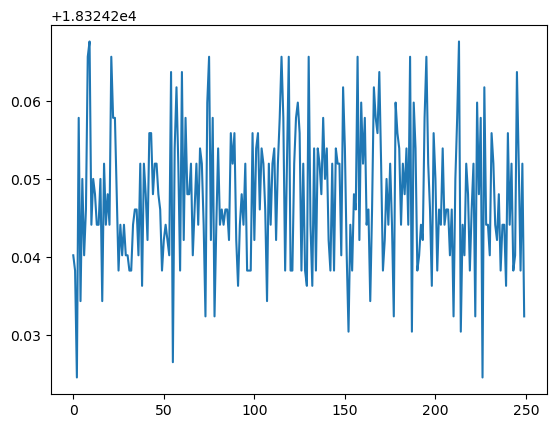

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['mse'])